### Load up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from clean import clean_data  as cd

In [2]:
orders = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name='Orders', header=1)
campaign = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name='Campaign Data')
process = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name='Order Process Data')
intern = pd.read_excel('.\data\Muesli Project raw data.xlsx', sheet_name='InternData Study')

KEY METRICS
- (perf_all - Patric) Whole delivery time = DeliveryDate - OrderDate (order date to delivery)
- (perf_warehouse - Joma) Warehouse Efficiency = Truck loading - OrderDate (order date to read to ship)
- (perf_logistics - Joma) Logistics Efficiency = DeliveryDate - Truck loading (ontruck to delivery)
- (perf_pickup - Patric) Pick Up Delay = Truck loading - OrderReady (ready to ship to ontruck)

#FOR LATER

#Delay Factor = OrderDate - OrderReceive (for comparison reasons)
#Express Difference for Whole delivery Time

### Truck Scan Date (df_process) = Pickup Date (df_intern)

In [3]:
df_test = process.merge(intern)
df_test[df_test['On Truck Scan Date'] == df_test['Pickup Date']]

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date
0,3416,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
1,3416,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
2,3417,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
3,3417,CA-2019-116540,2019-09-02,2019-09-03,Express,2019-09-02,2019-09-03
4,6937,CA-2019-129847,2019-09-02,2019-09-04,Express,2019-09-04,2019-09-04
...,...,...,...,...,...,...,...
748,5586,CA-2020-105333,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07
749,5587,CA-2020-105333,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07
750,5587,CA-2020-105333,2020-11-30,2020-12-07,Standard Processing,2020-12-04,2020-12-07
751,5066,CA-2020-142090,2020-11-30,2020-12-09,Standard Processing,2020-12-07,2020-12-09


### Used cleaning func

In [4]:
cd(orders, campaign, process, intern)

(      index        order_id order_date       ship_mode customer_id  \
 0        27  CA-2019-121755 2019-01-16    Second Class    EH-13945   
 1        45  CA-2019-118255 2019-03-11     First Class    ON-18715   
 2        48  CA-2019-169194 2019-06-20  Standard Class    LH-16900   
 3        60  CA-2019-111682 2019-06-17     First Class    TB-21055   
 4        63  CA-2018-135545 2018-11-24  Standard Class    KM-16720   
 ...     ...             ...        ...             ...         ...   
 9979   9760  CA-2019-146913 2019-10-31  Standard Class    SF-20965   
 9980   9787  US-2017-114377 2017-11-05     First Class    BG-11035   
 9984   9808  CA-2020-107209 2020-07-27    Second Class    JW-15955   
 9986   9830  US-2020-152842 2020-07-16  Standard Class    NF-18385   
 9988   9880  CA-2019-122581 2019-08-21  Standard Class    JK-15370   
 
          customer_name origin_channel country/region           city  \
 0        Eric Hoffmann          Email  United States    Los Angeles   
 1

In [5]:
display(orders.head(5))
display(campaign.head(5))
display(process.head(5))
display(intern.head(5))

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,...,sub-category,product_id,sales,quantity,discount,profit,order_date_year,order_date_month,order_date_weekday,order_date_day
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741,2019,1,2,16
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714,2019,3,0,11
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500,2019,6,3,20
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000,2019,6,0,17
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512,2018,11,5,24


,order_id,arrival_scan_date,customer_name,arrival_scan_date_year,arrival_scan_date_month,arrival_scan_date_weekday,arrival_scan_date_day
0,CA-2019-109666,2019-05-03,Kunst Miller,2019,5,4,3
1,CA-2019-138933,2019-05-03,Jack Lebron,2019,5,4,3
2,CA-2019-130001,2019-05-03,Heather Kirkland,2019,5,4,3
3,CA-2019-113061,2019-05-06,Ed Ludwig,2019,5,0,6
4,CA-2019-162138,2019-05-06,Grace Kelly,2019,5,0,6


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_date_year,order_date_month,order_date_weekday,order_date_day,on_truck_scan_date_year,on_truck_scan_date_month,on_truck_scan_date_weekday,on_truck_scan_date_day
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express,2019,1,3,3,2019,1,0,7
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing,2019,1,2,2,2019,1,2,9
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing,2019,1,3,3,2019,1,2,9
6,9494,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing,2019,1,3,3,2019,1,2,9
8,5868,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing,2019,1,4,4,2019,1,2,9


,order_id,ready_to_ship_date,pickup_date,ready_to_ship_date_year,ready_to_ship_date_month,ready_to_ship_date_weekday,ready_to_ship_date_day,pickup_date_year,pickup_date_month,pickup_date_weekday,pickup_date_day
0,CA-2019-116540,2019-09-02,2019-09-03,2019,9,0,2,2019,9,1,3
2,CA-2019-129847,2019-09-04,2019-09-04,2019,9,2,4,2019,9,2,4
3,CA-2019-129630,2019-09-04,2019-09-04,2019,9,2,4,2019,9,2,4
4,CA-2019-106278,2019-09-05,2019-09-06,2019,9,3,5,2019,9,4,6
5,CA-2019-158099,2019-09-05,2019-09-06,2019,9,3,5,2019,9,4,6


### Date Ranges of all Frames

In [6]:
print(orders['order_date'].min(),orders['order_date'].max())
print(campaign['arrival_scan_date'].min(),campaign['arrival_scan_date'].max())
print(process['on_truck_scan_date'].min(),process['on_truck_scan_date'].max())
print(intern['ready_to_ship_date'].min(),intern['ready_to_ship_date'].max())

2017-01-03 00:00:00 2020-12-30 00:00:00
2019-05-03 00:00:00 2020-05-15 00:00:00
2019-01-07 00:00:00 2021-01-06 00:00:00
2019-09-02 00:00:00 2020-12-07 00:00:00


### Calculation

In [7]:
ord_camp = orders.merge(campaign)

#### Calculate the Timedelta

In [8]:
intern['perf_pick_up'] = ((intern['pickup_date'])-(intern['ready_to_ship_date']))
ord_camp['perf_all'] = ((ord_camp['arrival_scan_date']-ord_camp['order_date']))

#### Calculate the Timedelta without Weekends

In [9]:
intern['perf_pick_up_bus'] = np.busday_count(intern['ready_to_ship_date'].values.astype('datetime64[D]'),intern['pickup_date'].values.astype('datetime64[D]'))
intern['perf_pick_up_bus'] = pd.to_timedelta(intern['perf_pick_up_bus'], unit="D")
ord_camp['perf_all_bus'] = np.busday_count(ord_camp['order_date'].values.astype('datetime64[D]'),ord_camp['arrival_scan_date'].values.astype('datetime64[D]'))
ord_camp['perf_all_bus'] = pd.to_timedelta(ord_camp['perf_all_bus'], unit="D")

#### Calculate the Averages

In [10]:
print('Pick Up Delay (ready to ship to on truck):',intern['perf_pick_up'].mean())
print('Whole delivery time (order date to delivery):',ord_camp['perf_all'].mean())
print('Pick Up Delay (ready to ship to on truck)(No Weekend):',intern['perf_pick_up_bus'].mean())
print('Whole delivery time (order date to delivery)(No Weekend):',ord_camp['perf_all_bus'].mean())

Pick Up Delay (ready to ship to on truck): 1 days 13:45:52.941176470
Whole delivery time (order date to delivery): 10 days 20:02:09.729729729
Pick Up Delay (ready to ship to on truck)(No Weekend): 1 days 08:35:17.647058823
Whole delivery time (order date to delivery)(No Weekend): 7 days 09:35:08.108108108


### Plotting

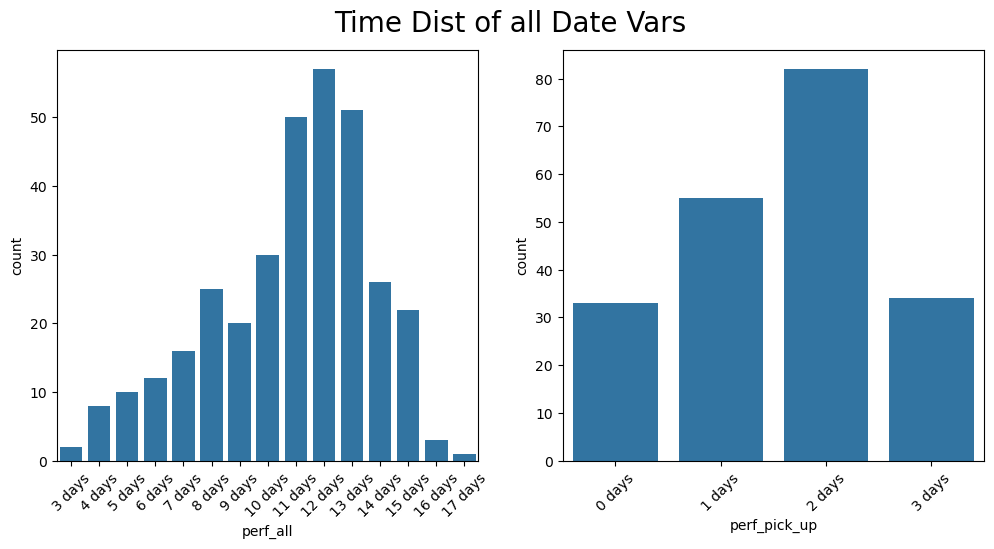

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 
plt.suptitle('Time Dist of all Date Vars', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.countplot(x=ord_camp['perf_all'], ax=ax[0], order=sorted(ord_camp['perf_all'].unique()))
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x=intern['perf_pick_up'], ax=ax[1], order=['{} days'.format(i) for i in range(4)])
ax[1].tick_params(axis='x', rotation=45)

plt.show()

In [12]:
print(ord_camp['perf_all'].dt.days.skew())
print(intern['perf_pick_up'].dt.days.skew())

-0.6205196618591234
-0.19557850285003003


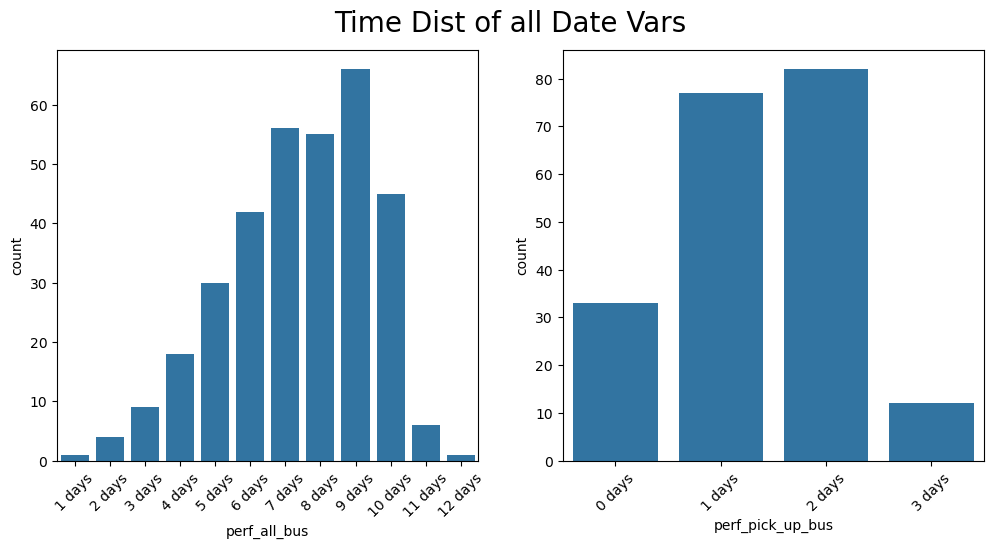

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # 
plt.suptitle('Time Dist of all Date Vars', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.countplot(x=ord_camp['perf_all_bus'], ax=ax[0], order=sorted(ord_camp['perf_all_bus'].unique()))
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x=intern['perf_pick_up_bus'], ax=ax[1], order=sorted(intern['perf_pick_up_bus'].unique()))
ax[1].tick_params(axis='x', rotation=45)

plt.show()

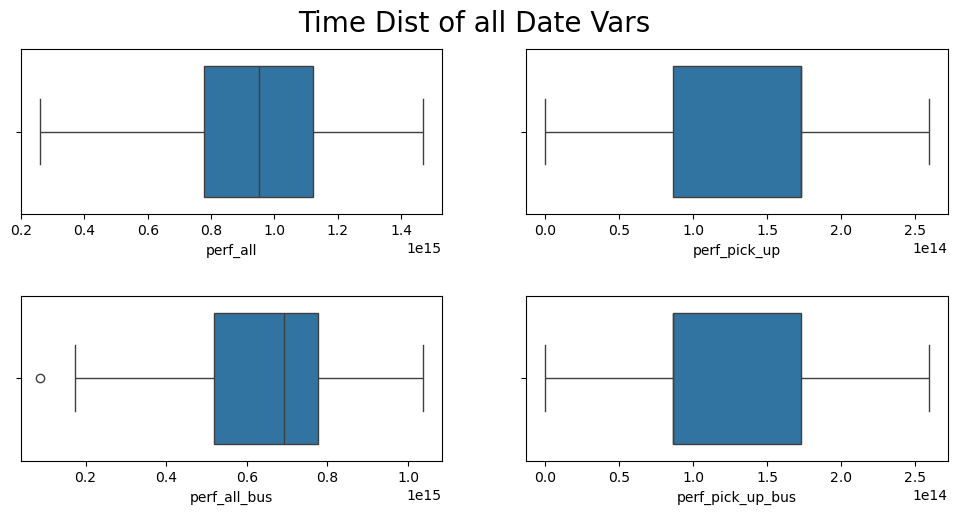

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5)) # 
plt.suptitle('Time Dist of all Date Vars', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2, top=.9)

sns.boxplot(x=ord_camp['perf_all'], ax=ax[0][0])
sns.boxplot(x=intern['perf_pick_up'], ax=ax[0][1])
sns.boxplot(x=ord_camp['perf_all_bus'], ax=ax[1][0])
sns.boxplot(x=intern['perf_pick_up_bus'], ax=ax[1][1])

plt.show()

### Plots for Slides

#### Timedelta to Float per Day

In [15]:
ord_camp['perf_all_bus'] = ord_camp['perf_all_bus'] / pd.Timedelta(days=1)
intern['perf_pick_up_bus'] = intern['perf_pick_up_bus'] / pd.Timedelta(days=1)

#### Plot of Overall Perfomance

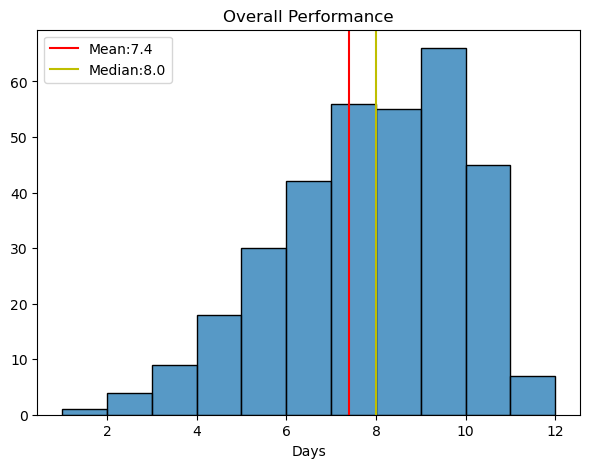

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5)) 
sns.histplot(x=ord_camp['perf_all_bus'], bins=11)
ax.axvline(x=ord_camp['perf_all_bus'].mean(),label=f'Mean:{round(ord_camp['perf_all_bus'].mean(),2)}', color='r')
ax.axvline(x=ord_camp['perf_all_bus'].median(),label=f'Median:{round(ord_camp['perf_all_bus'].median(),2)}', color='y')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='Days')
ax.set_title('Overall Performance')
ax.legend()
plt.show();

#### Plot of Ready to Pickup Delay

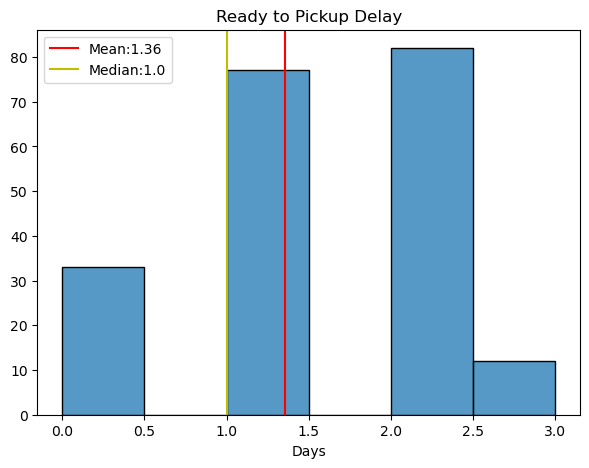

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5)) 
sns.histplot(x=intern['perf_pick_up_bus'], bins=6)
ax.axvline(x=intern['perf_pick_up_bus'].mean(),label=f'Mean:{round(intern['perf_pick_up_bus'].mean(),2)}', color='r');
ax.axvline(x=intern['perf_pick_up_bus'].median(),label=f'Median:{round(intern['perf_pick_up_bus'].median(),2)}', color='y');
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='Days')
ax.set_title('Ready to Pickup Delay')
ax.legend()
plt.show();

In [18]:
print(ord_camp['perf_all_bus'].skew())
print(intern['perf_pick_up_bus'].skew())

-0.5085208603678116
-0.1014408922401394


In [31]:
print(ord_camp['perf_all_bus'].describe())
print(intern['perf_pick_up_bus'].describe())

count    333.000000
mean       7.399399
std        2.050477
min        1.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       12.000000
Name: perf_all_bus, dtype: float64
count    204.000000
mean       1.357843
std        0.821141
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: perf_pick_up_bus, dtype: float64
